In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.1

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.144 Seconds
Building LP ...
	Done. Took 0.142 Seconds
Building M ...
	Done. Took 0.174 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 14.324
	Done. Took 0.765 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -9.811*(0.058)^t + -6.623*(0.090)^t + 0.505*(0.490)^t + 4.139*(0.010)^t + -0.458*(0.360)^t + 11.746*(0.091)^t + 0.501608 * delta(t,0)
		RMSE = 0.035
		Matlab: [ -9.81   0.06  -6.62   0.09   0.5    0.49   4.14   0.01  -0.46   0.36  11.75   0.09]
	Done. Took 95.040 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -6.509*(0.017)^t + -0.107*(-0.669)^t + -1.878*(0.014)^t + -1.096*(0.693)^t + 1.104*(0.743)^t + -1.495*(0.016)^t + 9.981216 * delta(t,0)
		RMSE = 0.017
		Matlab: [-6.51  0.02 -0.11 -0.67 -1.88  0.01 -1.1   0.69  1.1   0.74 -1.49  0.02]
	Done. Took 62.297 Second

{0: {1: array([ -9.81,   0.06,  -6.62,   0.09,   0.5 ,   0.49,   4.14,   0.01,  -0.46,   0.36,  11.75,   0.09]),
  2: array([-6.51,  0.02, -0.11, -0.67, -1.88,  0.01, -1.1 ,  0.69,  1.1 ,  0.74, -1.49,  0.02])},
 1: {0: array([  0.34,  -0.16,  -0.95,   0.22,  -0.65,  -0.02,   5.51,  -0.1 ,  10.23,   0.04,   6.04,   0.04]),
  2: array([ 11.28,   0.06,   6.44,   0.11,   1.71,   0.3 ,  -5.64,   0.15, -10.08,   0.01,  -5.47,   0.17])},
 2: {0: array([-0.54,  0.06,  6.72,  0.25, -3.41,  0.9 , -1.68,  0.76, -6.19,  0.21,  4.72,  0.87]),
  1: array([  4.33,   0.58,   5.87,   0.83, -15.8 ,   0.7 ,   3.09,   0.58,   2.45,   0.58,   5.01,  -0.02])}}

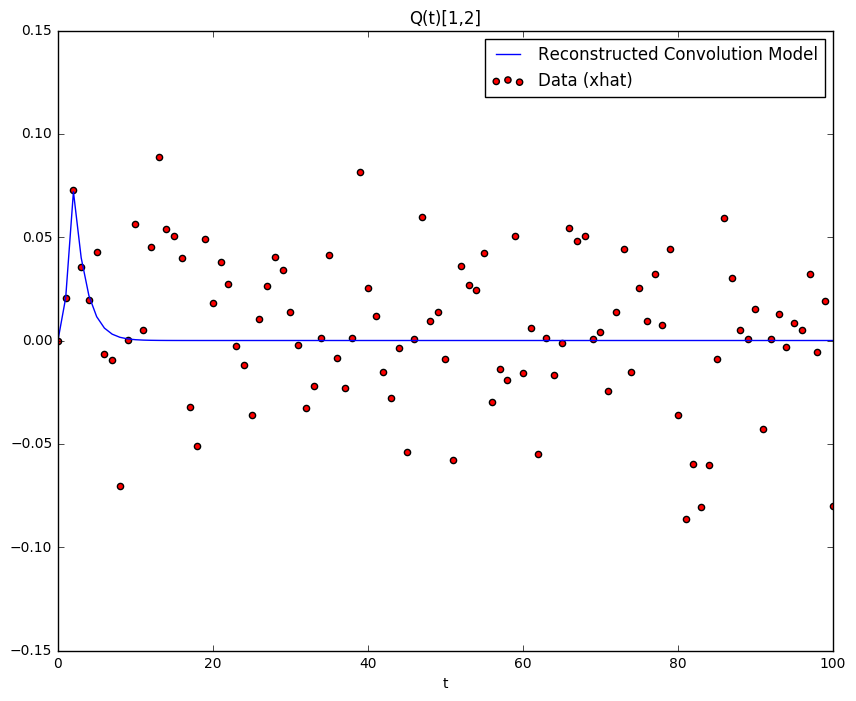

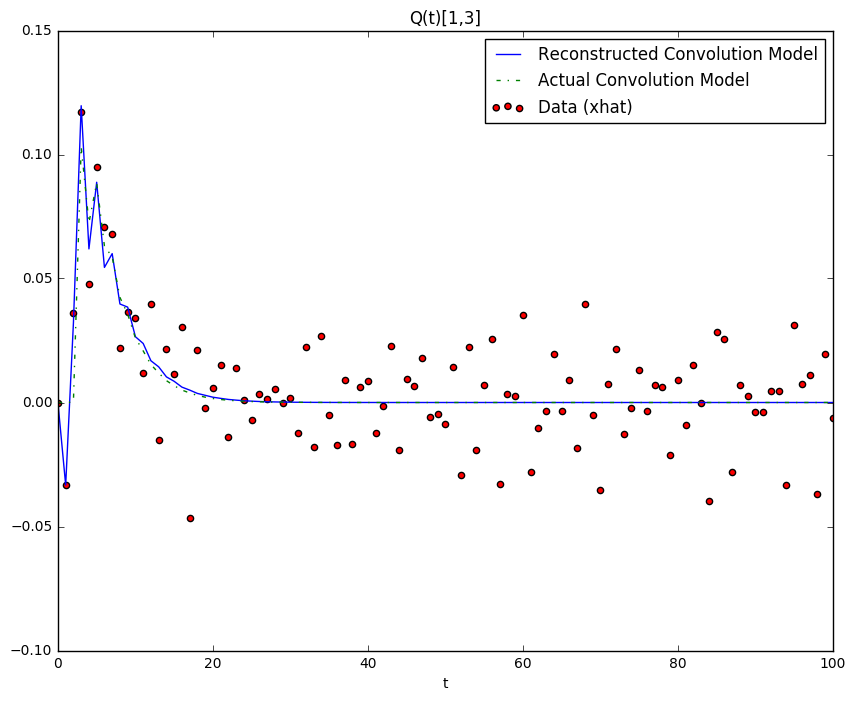

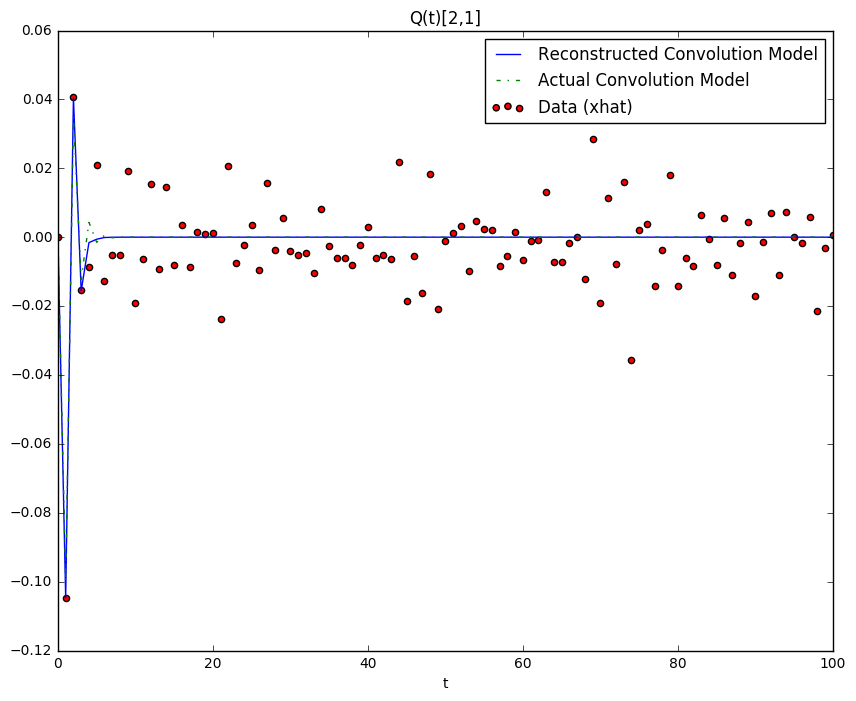

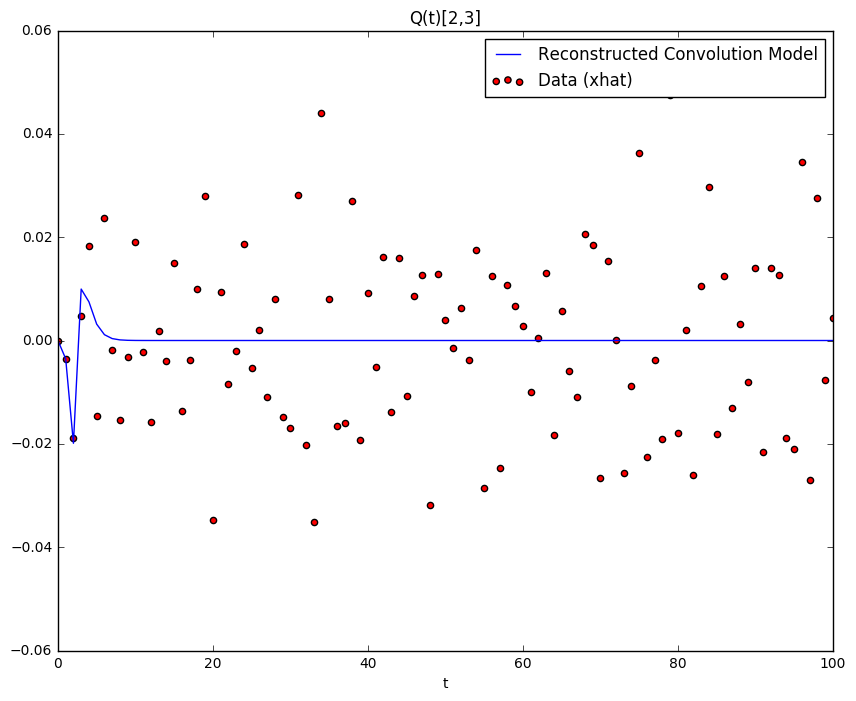

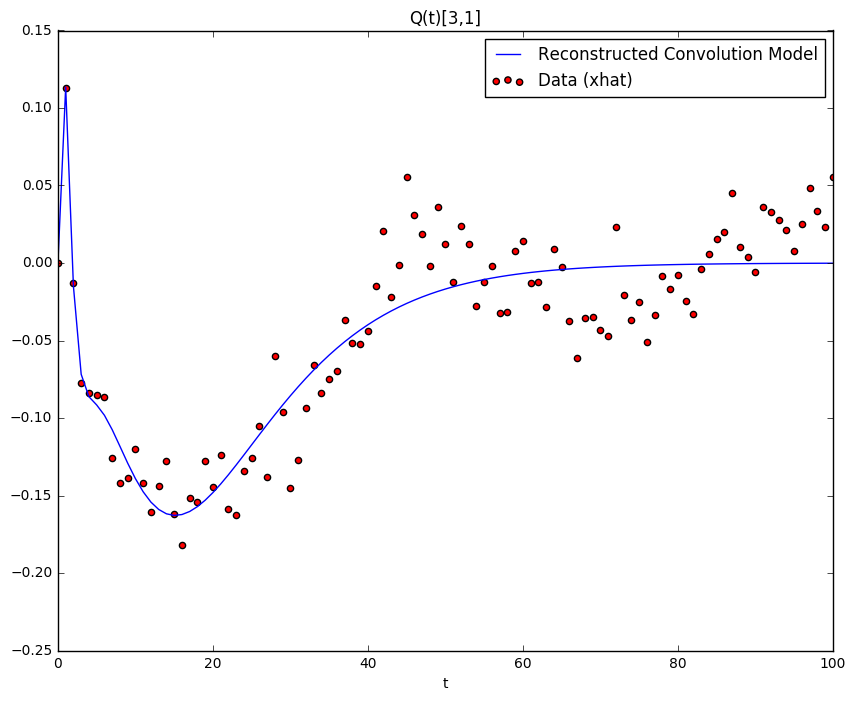

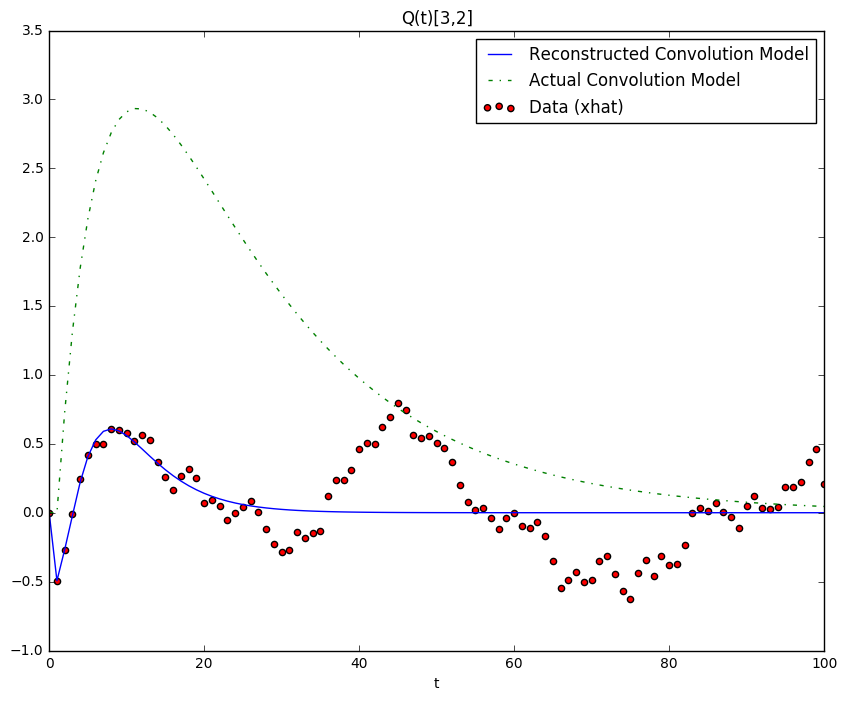

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=20, order=6, real_params=real_params, robust=False)
recon.measured(y + np.random.randn(u.shape[0], u.shape[1]) * gamma, u, plot=True)  #, ij=(1,3))